# Demonstration of control of SBIG CCD cameras and focusing via Birger Engineering adaptors

In [1]:
# Load the PANOPTES module dir
import sys
sys.path.append('../../')

In [2]:
import astropy.units as u
import os
import glob
import time
from IPython.display import Image

In [3]:
from pocs.observatory import Observatory
from pocs.camera.sbig import Camera
from pocs.scheduler.field import Field
from pocs.scheduler.observation import Observation

In [4]:
obs = Observatory()

2017-02-07 16:23:38 aaomc48as.aao.gov.au panoptes[6915] INFO ******************************** Starting POCS *********************************
2017-02-07 16:23:38 aaomc48as.aao.gov.au panoptes[6915] INFO 	Initializing observatory
2017-02-07 16:23:38 aaomc48as.aao.gov.au panoptes[6915] INFO 		 Setting up location
2017-02-07 16:23:38 aaomc48as.aao.gov.au panoptes[6915] INFO 		 Setting up mount
2017-02-07 16:23:38 aaomc48as.aao.gov.au panoptes[6915] INFO 		Using simulator mount
2017-02-07 16:23:39 aaomc48as.aao.gov.au panoptes[6915] INFO 		 Setting up cameras
2017-02-07 16:23:43 aaomc48as.aao.gov.au panoptes[6915] INFO 			 SBIGDriver initialised: found 2 cameras
2017-02-07 16:23:57 aaomc48as.aao.gov.au panoptes[6915] INFO 			 Birger Focuser (14285) on /dev/tty.USA49WG45P2.2 initialised
2017-02-07 16:24:00 aaomc48as.aao.gov.au panoptes[6915] INFO 			 Cam00 (83F010801) initialised
2017-02-07 16:24:14 aaomc48as.aao.gov.au panoptes[6915] INFO 			 Birger Focuser (14286) on /dev/tty.USA49WG45P1.

In [5]:
obs.cameras

OrderedDict([('Cam00', <pocs.camera.sbig.Camera at 0x11314ac88>),
             ('Cam01', <pocs.camera.sbig.Camera at 0x113146978>)])

In [6]:
obs.cameras['Cam00'].uid

'83F010801'

In [7]:
obs.cameras['Cam00'].ccd_set_point

<Quantity 0.18901872786513252 deg_C>

In [8]:
obs.cameras['Cam00'].ccd_temp

<Quantity -0.23181540522300637 deg_C>

In [9]:
obs.autofocus_cameras(coarse=True)

{'Cam00': <threading.Event at 0x10ec8a550>,
 'Cam01': <threading.Event at 0x1136200b8>}

2017-02-07 16:26:44 aaomc48as.aao.gov.au panoptes[6915] INFO Coarse focus plot for camera Cam00 (83F010801) written to /Users/ajh/Documents/git/images/focus/83F010801/20170207T052457.png
2017-02-07 16:26:46 aaomc48as.aao.gov.au panoptes[6915] INFO Coarse focus plot for camera Cam01 (83F011639) written to /Users/ajh/Documents/git/images/focus/83F011639/20170207T052457.png
2017-02-07 16:28:35 aaomc48as.aao.gov.au panoptes[6915] INFO Fine focus plot for camera Cam00 (83F010801) written to /Users/ajh/Documents/git/images/focus/83F010801/20170207T052646.png
2017-02-07 16:28:38 aaomc48as.aao.gov.au panoptes[6915] INFO Fine focus plot for camera Cam01 (83F011639) written to /Users/ajh/Documents/git/images/focus/83F011639/20170207T052648.png


In [8]:
focus_events = []
for camera in obs.cameras.values():
    focus_events.append(camera.autofocus(coarse=True))

2017-02-06 19:10:49 aaomc48as.aao.gov.au panoptes[5803] INFO Coarse focus plot for camera Cam01 (83F011639) written to /Users/ajh/Documents/git/images/focus/83F011639/20170206T080906.png
2017-02-06 19:10:51 aaomc48as.aao.gov.au panoptes[5803] INFO Coarse focus plot for camera Cam00 (83F010801) written to /Users/ajh/Documents/git/images/focus/83F010801/20170206T080906.png
2017-02-06 19:12:40 aaomc48as.aao.gov.au panoptes[5803] INFO Fine focus plot for camera Cam01 (83F011639) written to /Users/ajh/Documents/git/images/focus/83F011639/20170206T081051.png
2017-02-06 19:12:43 aaomc48as.aao.gov.au panoptes[5803] INFO Fine focus plot for camera Cam00 (83F010801) written to /Users/ajh/Documents/git/images/focus/83F010801/20170206T081053.png


Create an SBIG Camera instance with associated focuser, explicitly setting all the parameters.

In [4]:
c0 = Camera(set_point=0,
            port='83F011167',
            focuser='birger',
            focus_port='/dev/tty.USA49WG2P4.4',
            focus_initial=14350,
            autofocus_range=(200,2000),
            autofocus_step=(10,100),
            autofocus_seconds=0.1)

2017-01-23 20:25:50 aaomc48as.aao.gov.au panoptes[4220] INFO 			 SBIGDriver initialised: found 1 cameras
2017-01-23 20:26:04 aaomc48as.aao.gov.au panoptes[4220] INFO 			 Birger Focuser (10858) on /dev/tty.USA49WG2P4.4 initialised
2017-01-23 20:26:06 aaomc48as.aao.gov.au panoptes[4220] INFO 			 SBIG Camera (83F011167) initialised


In [5]:
c0.uid

'83F011167'

In [6]:
c0._info

{'AO8': False,
 'Biorad_TDI_support': False,
 'STXL': False,
 'Truesense': False,
 'bad_columns': [],
 'camera_name': 'SBIG STF-8300 CCD Camera',
 'camera_type': 'STF_CAMERA',
 'colour': False,
 'dump_extra': 0,
 'electronic_shutter': False,
 'firmware_version': '2.45',
 'frame_buffer': True,
 'frame_transfer': False,
 'imaging_ABG': True,
 'mechanical_shutter': True,
 'readout_modes': {'RM_1X1': {'gain': <Quantity 0.37 electron / adu>,
   'height': <Quantity 2532.0 pix>,
   'pixel_height': <Quantity 5.4 um>,
   'pixel_width': <Quantity 5.4 um>,
   'width': <Quantity 3352.0 pix>},
  'RM_1X1_VOFFCHIP': {'gain': <Quantity 0.37 electron / adu>,
   'height': <Quantity 2532.0 pix>,
   'pixel_height': <Quantity 5.4 um>,
   'pixel_width': <Quantity 5.4 um>,
   'width': <Quantity 3352.0 pix>},
  'RM_2X2': {'gain': <Quantity 0.37 electron / adu>,
   'height': <Quantity 1266.0 pix>,
   'pixel_height': <Quantity 10.8 um>,
   'pixel_width': <Quantity 10.8 um>,
   'width': <Quantity 1676.0 pix>},
 

In [7]:
c0.ccd_cooling_enabled

True

In [8]:
c0.ccd_set_point

<Quantity 0.18901872786513252 deg_C>

In [9]:
c0.ccd_temp

<Quantity -0.23181540522300637 deg_C>

In [10]:
c0.ccd_cooling_power

40.78431372549019

Delete any FITS files from previous runs of this notebook

In [10]:
for fits_name in glob.glob('*.fits'):
    os.unlink(fits_name)

Basic exposure. By default this is non-blocking so sleep for a while to allow it to complete.

In [12]:
c0.take_exposure(1.0, filename='test0.fits')
time.sleep(5)

Basic dark exposure, shutter will be kept closed throughout.

In [13]:
c0.take_exposure(1.0, filename='test1.fits', dark = True)
time.sleep(5)

Take a series of dark exposures one after another using the blocking option

In [14]:
for i in range(2,5):
    c0.take_exposure(0, filename='bias{}.fits'.format(i), dark=True, blocking=True)

Start two dark exposures without waiting for the first to finish. This will generate warnings, but will still work. Don't do this though!

In [15]:
c0.take_exposure(1.0, filename='test5.fits', dark = True)
c0.take_exposure(1.0, filename='test6.fits', dark = True)
time.sleep(10)

2017-01-23 15:40:50 aaomc48as.aao.gov.au panoptes[99823] WARNING Attempt to start exposure on 0 while camera busy!
2017-01-23 15:40:50 aaomc48as.aao.gov.au panoptes[99823] WARNING Waiting for exposure on 0 to complete
2017-01-23 15:40:51 aaomc48as.aao.gov.au panoptes[99823] WARNING Waiting for exposure on 0 to complete


Take an exposure using the higher level `take_observation()` interface. This will also call `process_observation()` on the resulting FITS file.

In [16]:
field = Field('Test Observation', '20h00m43.7135s +22d42m39.0645s')
observation = Observation(field, exp_time=1.5 * u.second)
e0 = c0.take_observation(observation, headers={})

## Focusing test

Deliberately defocus the camera a bit

In [5]:
c0.focuser.move_to(13500)

13500

Run a coarse focus first

In [6]:
c0.autofocus(coarse=True, plots=True)

2017-01-23 20:28:05 aaomc48as.aao.gov.au panoptes[4220] INFO Autofocus plot for camera SBIG Camera (83F011167) written to /Users/ajh/Documents/git/images/focus/83F011167/20170123T092610.png


(13500, 14400)

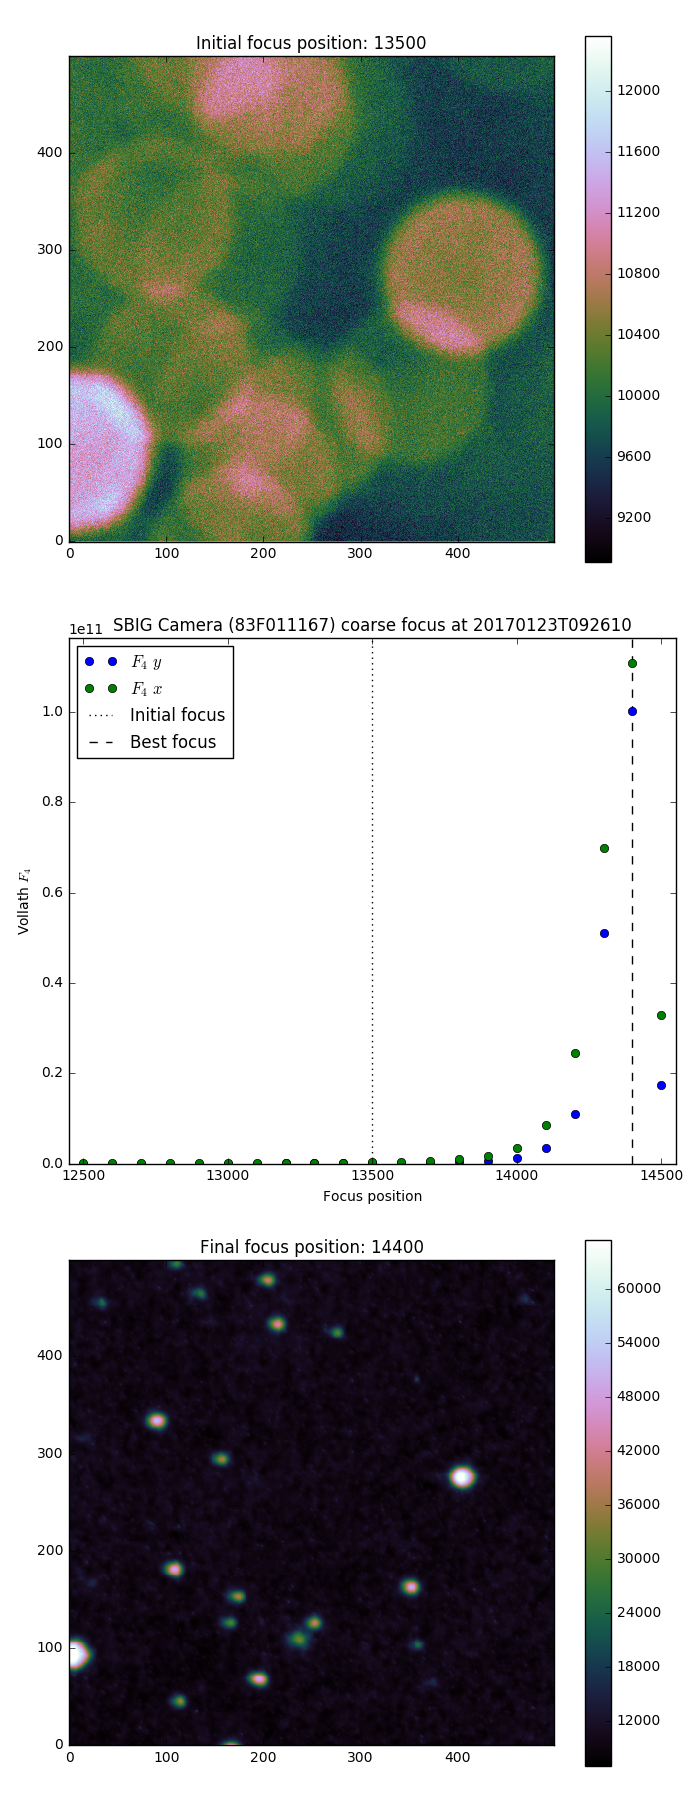

In [8]:
Image('/Users/ajh/Documents/git/images/focus/83F011167/20170123T092610.png')

Now fine focus

In [7]:
c0.autofocus(plots=True)

2017-01-23 20:30:02 aaomc48as.aao.gov.au panoptes[4220] INFO Autofocus plot for camera SBIG Camera (83F011167) written to /Users/ajh/Documents/git/images/focus/83F011167/20170123T092807.png


(14400, 14366)

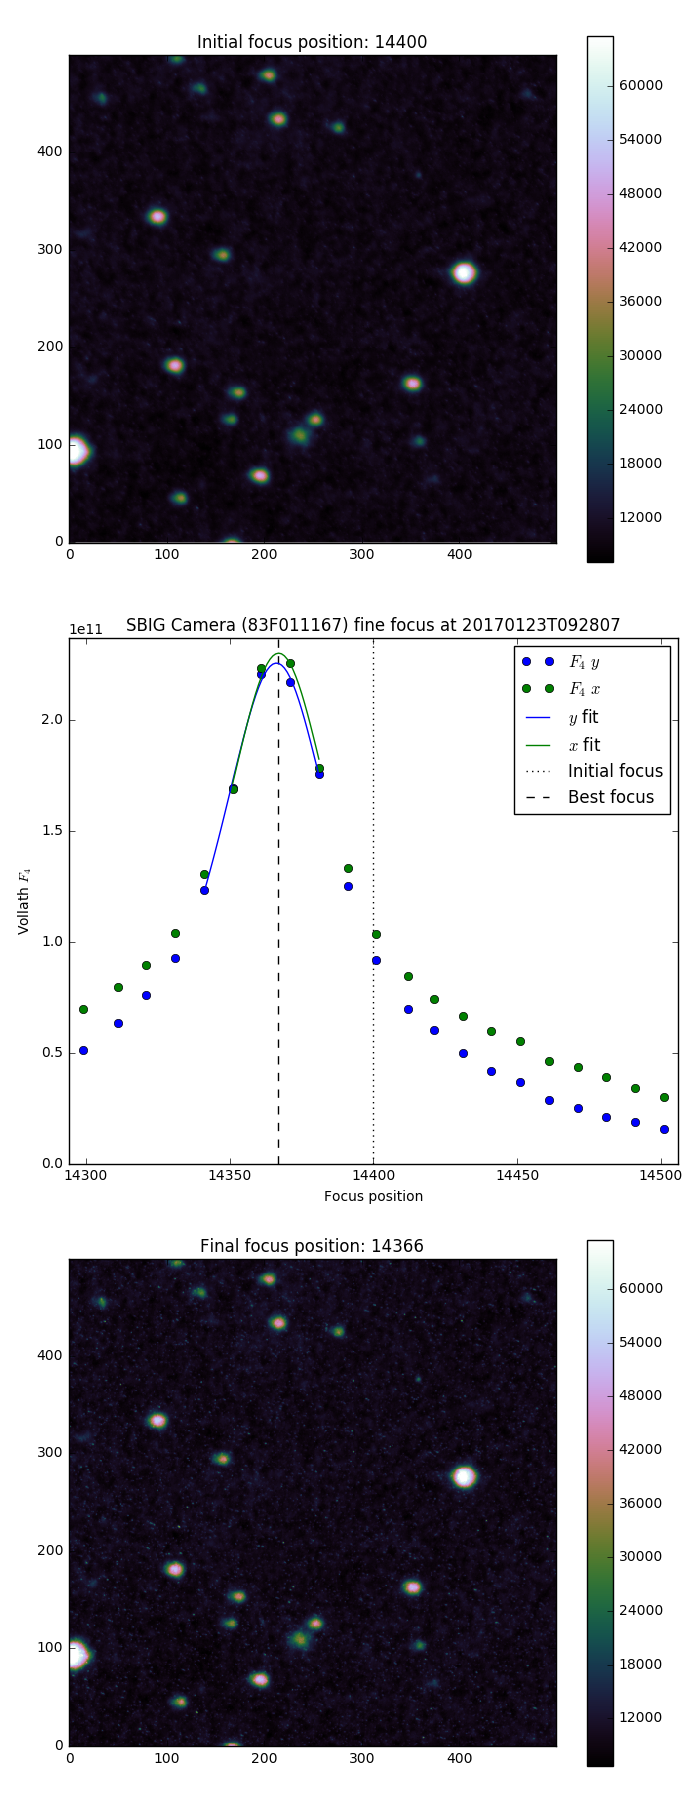

In [9]:
Image('/Users/ajh/Documents/git/images/focus/83F011167/20170123T092807.png')

In [9]:
import numpy as np

In [10]:
np.float

float

AttributeError: 'builtin_function_or_method' object has no attribute 'as_type'

In [3]:
import os

In [4]:
os.getenv('POCS')

'/Users/ajh/Documents/git/POCS'

In [4]:
from pocs.camera.simulator import Camera as SimCamera
from pocs.focuser.simulator import Focuser as SimFocuser

In [5]:
cam = SimCamera(focuser={'model': 'simulator',
                                           'focus_port': '/dev/ttyFAKE',
                                           'initial_position': 20000,
                                           'autofocus_range': (40, 80),
                                           'autofocus_step': (10, 20),
                                           'autofocus_seconds': 0.1,
                                           'autofocus_size': 500})

2017-02-09 15:24:47 aaomc48as.aao.gov.au panoptes[9958] INFO ******************************** Starting POCS *********************************
2017-02-09 15:24:48 aaomc48as.aao.gov.au panoptes[9958] INFO 			 Simulated Focuser (SF9999) on /dev/ttyFAKE initialised


In [6]:
cam.connect()

In [7]:
cam.autofocus()

2017-02-09 15:24:54 aaomc48as.aao.gov.au panoptes[9958] WARNING Best focus outside sweep range, aborting autofocus on Generic Camera (999999) on None with Simulated Focuser focuser!
2017-02-09 15:24:56 aaomc48as.aao.gov.au panoptes[9958] INFO Fine focus plot for camera Generic Camera (999999) on None with Simulated Focuser focuser written to /Users/ajh/Documents/git/images/focus/999999/20170209T042448.png


In [13]:
cam.autofocus(coarse=True)

2017-02-09 14:24:15 aaomc48as.aao.gov.au panoptes[7270] WARNING Best focus outside sweep range, aborting autofocus on Generic Camera (999999) on None with Simulated Focuser focuser!
2017-02-09 14:24:17 aaomc48as.aao.gov.au panoptes[7270] INFO Coarse focus plot for camera Generic Camera (999999) on None with Simulated Focuser focuser written to /Users/ajh/Documents/git/images/focus/999999/20170209T032409.png
2017-02-09 14:24:23 aaomc48as.aao.gov.au panoptes[7270] WARNING Best focus outside sweep range, aborting autofocus on Generic Camera (999999) on None with Simulated Focuser focuser!
2017-02-09 14:24:24 aaomc48as.aao.gov.au panoptes[7270] INFO Fine focus plot for camera Generic Camera (999999) on None with Simulated Focuser focuser written to /Users/ajh/Documents/git/images/focus/999999/20170209T032417.png


In [14]:
import matplotlib

In [15]:
matplotlib.backends

<module 'matplotlib.backends' from '/Users/ajh/anaconda/envs/POCS/lib/python3.5/site-packages/matplotlib/backends/__init__.py'>

In [16]:
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'